# Powerline effect in Butte and Glenn Counties, CA

Figures 11 and 12 of the Kang et al. (2020) are generated using this notebook. 
To run the simulation, you need to run `skytem-butte-powerline.py` in the folder. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_hm_bg = np.load("./skytem_butte_powerline/data_hm_background.npy")
data_lm_bg = np.load("./skytem_butte_powerline/data_lm_background.npy")
data_powerline = np.load("./skytem_butte_powerline/data.npy")
xyz = np.load("./skytem_butte_powerline/xyz.npy")

In [5]:
data_hm_powerline = data_powerline[:100*30].reshape((30, 100), order='F').T
data_lm_powerline = data_powerline[100*30:].reshape((20, 100), order='F').T  

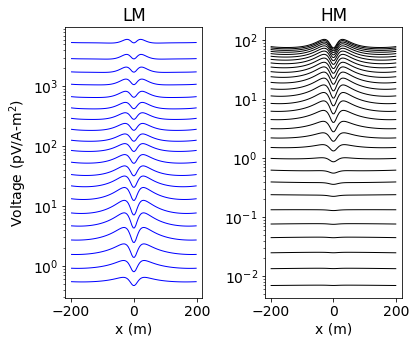

In [7]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 14
moment = np.pi*(13.25**2) * 1e-12

fig, axs = plt.subplots(1, 2, figsize = (6,5))

out = axs[0].semilogy(xyz[:,0], -data_lm_powerline[:,:]/moment, 'b-', lw=1)
out = axs[1].semilogy(xyz[:,0], -data_hm_powerline[:,:]/moment, 'k-', lw=1)

for ax in axs:
    ax.set_xlabel('x (m)')
axs[0].set_ylabel("Voltage (pV/A-m$^2$)")
axs[0].set_title("LM")
axs[1].set_title("HM")
plt.tight_layout()
fig.savefig('./figures/figure-11', dpi=200)

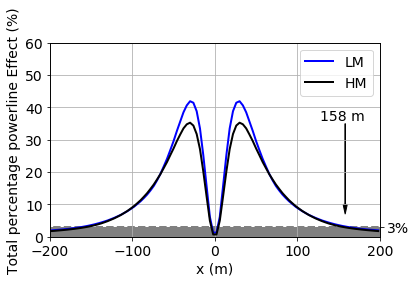

In [8]:
tpe_hm = ( abs((data_hm_powerline-data_hm_bg) / data_hm_bg) ).sum(axis=1) * 100 / 30.
tpe_lm = ( abs((data_lm_powerline-data_lm_bg) / data_lm_bg) ).sum(axis=1) * 100 / 20.
inds = np.logical_and(tpe_hm < 3., xyz[:,0]>10.)
inds = np.logical_and(tpe_lm < 3., xyz[:,0]>10.)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(xyz[:,0], tpe_lm, 'b', lw=2)
ax.plot(xyz[:,0], tpe_hm, 'k', lw=2)
ax.legend(("LM", "HM"), loc=1)
ax.fill_between([-210, 210], [3, 3], color='grey', linestyle='--', lw=2)
ax.set_ylim(0, 60)
ax.set_xlim(-200, 200)
ax.set_ylabel("Total percentage powerline Effect (%)")
ax.grid(True)
ax.set_xlabel("x (m)")
ax_1 = ax.twinx()
ax_1.set_ylim(0, 60)
ax_1.set_yticks([3.])
ax_1.set_yticklabels(['3%'])
ax.arrow(158, 35, 0, -25, head_width=5, head_length=3, fc='k', ec='k')
ax.text(158-30, 36, '158 m')
plt.tight_layout()
fig.savefig('./figures/figure-12', dpi=200)